In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
from time import sleep


In [4]:
PATH_JSON_INFO = '/Datasets/PICAI_olmos/info-12x32x32.json'
#read json

with open(PATH_JSON_INFO, 'r') as f:
    info = json.load(f)

In [8]:
#convet the info dict to a dataframe
import pandas as pd
df = pd.DataFrame(info).T
df.head()

,mri_date,patient_age,psa,psad,prostate_volume,histopath_type,lesion_GS,lesion_ISUP,case_ISUP,case_csPCa,centroid,path_id,label
11107_1001130,2019-06-12,64,3.9,0.03,106.0,NaN,NaN,[0],0,NO,"[201, 200, 11]",/data/jaolmosr/2023_prostate_deep_representati...,0
10078_1000078,2012-06-30,51,7.6,0.14,56.0,MRBx,4+4,4,4,YES,"[116, 289, 11]",/data/jaolmosr/2023_prostate_deep_representati...,1
11244_1001267,2017-10-01,71,9.2,NaN,80.0,MRBx,0+0,0,0,NO,"[165, 218, 13]",/data/jaolmosr/2023_prostate_deep_representati...,0
11024_1001044,2017-01-05,72,14.4,0.13,107.0,NaN,NaN,[0],0,NO,"[148, 184, 11]",/data/jaolmosr/2023_prostate_deep_representati...,0
10798_1000814,2017-01-01,72,50.0,NaN,45.0,SysBx,4+3,3,3,YES,"[187, 183, 13]",/data/jaolmosr/2023_prostate_deep_representati...,1


In [37]:
#Read each centroid (3 coordinates) and append to a list
centroids_x = []
centroids_y = []
isups = []

for i in range(len(df)):
    centroids_x.append(df['centroid'][i][0])
    centroids_y.append(df['centroid'][i][1])
    isups.append(df['case_ISUP'][i])



/tmp/ipykernel_257611/779198437.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  centroids_x.append(df['centroid'][i][0])
/tmp/ipykernel_257611/779198437.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  centroids_y.append(df['centroid'][i][1])
/tmp/ipykernel_257611/779198437.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  isups.append(df['case_ISUP'][i])


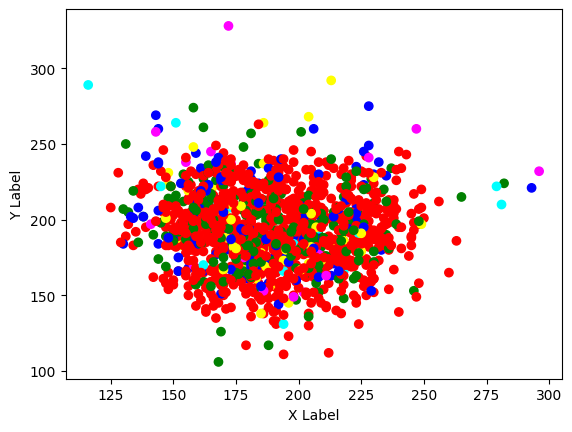

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


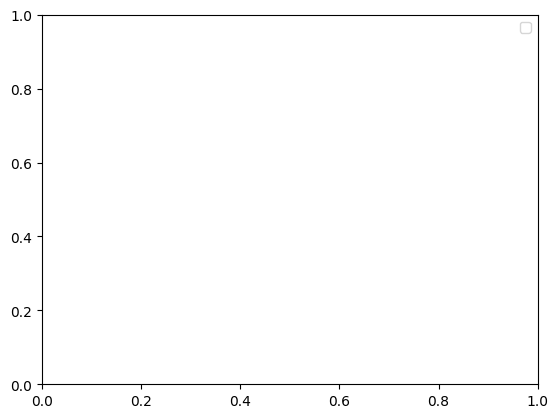

In [42]:
#Make a 3d plot of each centroid colored by the ISUP
fig = plt.figure()
color = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'cyan', 5:'magenta'}
colors = [color[i] for i in isups]

plt.scatter(x = centroids_x, y = centroids_y, c=colors)


plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()
plt.legend()

In [36]:
len(centroids_x)

5

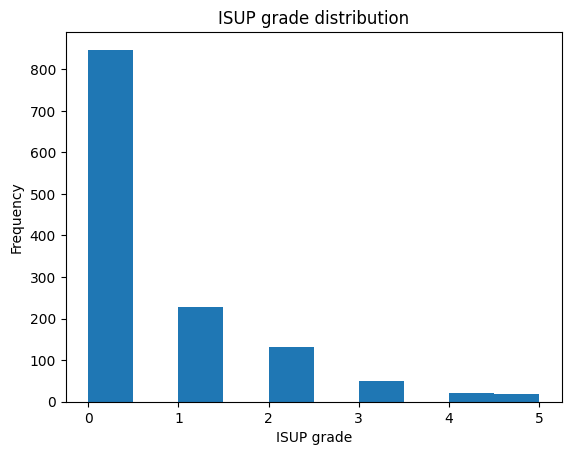

In [10]:
#Plot histogram distribution of case_ISUP
plt.hist(df['case_ISUP'], bins=10)
plt.xlabel('ISUP grade')
plt.ylabel('Frequency')
plt.title('ISUP grade distribution')
plt.show()

In [4]:
names = [key for key in info.keys()]
def apply_log(cov):
    #Make eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    #Apply log to the eigenvalues
    eigenvalues = np.log(eigenvalues)
    #Reconstruct the covariance matrix
    new_cov = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T

    return new_cov

In [5]:
def get_triu(cov):
    return cov[np.triu_indices(cov.shape[0])]

In [6]:
# Read all covariances
covs_flatten = []
i = 0
long = len(names)
for name in names:
    cov = np.load(f"/Datasets/PICAI_covs_VGG19/covs/{name}.npy")
    covs_flatten.append(get_triu(cov))
    i = i+1
    print(f"Process {i}/{long}  - ({round((i/long)*100,3)}% done)", end="\r")
    sleep(0.2)

: 

In [1]:
260+109+41+55

465